# Notebook to train models

In [1]:
# Load packages
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import numpy as np
import random
import time as time
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import torch.nn.functional as F
import umap

from models import cl_dummy_model1 as scRNASeq_model
from functions import data_preprocessing as dp

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initiate train Env
#'../../data/processed/immune_cells/merged/Oetjen_merged.h5ad' '../../data/processed/immune_cells/merged/Immune_cells_merged_all.h5ad'
train_env = scRNASeq_model.train_module(data_path='../../data/processed/immune_cells/merged/Oetjen_merged.h5ad',
                                        save_model_path='trained_models/cl_dummy_models1/',
                                        HVG=True,
                                        HVGs=4000,
                                        Scaled=False)

In [4]:
# Train
all_preds, all_preds_indices = train_env.train(device=None,
                                                seed=42,
                                                folds=5,
                                                cv=False,
                                                batch_size=256,
                                                attn_embed_dim=24,
                                                depth=4,
                                                num_heads=1,
                                                output_dim=100,
                                                attn_drop_out=0.,
                                                proj_drop_out=0.3,
                                                attn_bias=False,
                                                act_layer=nn.Tanh,
                                                norm_layer=nn.LayerNorm,
                                                loss_with_weights=True,
                                                init_temperature=0.15,
                                                init_lr=0.001,
                                                lr_scheduler_warmup=4,
                                                lr_scheduler_maxiters=25,
                                                print_rate=2,
                                                epochs=20,
                                                earlystopping_threshold=10)

Number of parameters: 11301200

Start Training CV fold 1



  0%|          | 0/20 [00:00<?, ?it/s]

TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.12

  5%|▌         | 1/20 [00:39<12:28, 39.42s/it]

TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
Epoch 1 | Training loss: 0.0380 | Validation loss: 0.0220
TEMP:  Parameter containing:
tensor(0.1200, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1197, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1195, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1192, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1190, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1187, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1184, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1182, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1179, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1176, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1174, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1171, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1168, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1166, re

 10%|█         | 2/20 [01:18<11:43, 39.07s/it]

TEMP:  Parameter containing:
tensor(0.1074, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1068, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1063, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1058, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1052, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1047, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1041, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1035, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1030, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1024, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1018, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1013, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1007, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1002, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.1000, requires_grad=True)
TEMP:  Parameter containing:
tensor(0.10

 10%|█         | 2/20 [01:33<14:01, 46.77s/it]


KeyboardInterrupt: 

In [4]:
# Define model
model = scRNASeq_model.CellType2VecModel(input_dim=train_env.data_env.X.shape[1],
                                 attn_embed_dim=24, 
                                 output_dim=200)

print(model)
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

CellType2VecModel(
  (blocks): ModuleList(
    (0): AttentionBlock(
      (attnblock_norm1): LayerNorm((4000,), eps=1e-05, elementwise_affine=True)
      (attnblock_attn): MultiheadAttention(
        (qkv_proj): CustomScaleModule()
        (o_proj): Linear(in_features=24, out_features=1, bias=True)
        (attn_dropout1): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm_layer_in): LayerNorm((4000,), eps=1e-05, elementwise_affine=True)
  (linear1): Linear(in_features=4000, out_features=2000, bias=True)
  (norm_layer1): LayerNorm((2000,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (linear1_act): Tanh()
  (linear2): Linear(in_features=2000, out_features=1000, bias=True)
  (norm_layer2): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (linear2_act): Tanh()
  (output): Linear(in_features=1000, out_features=200, bias=True)
)
Parameter blocks.0.attnblock_norm1.weight, shape torch.Size([4000])
P

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\user\AppData\Local\Temp\ipykernel_14236\1088779285.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(color_map.cat.categories))


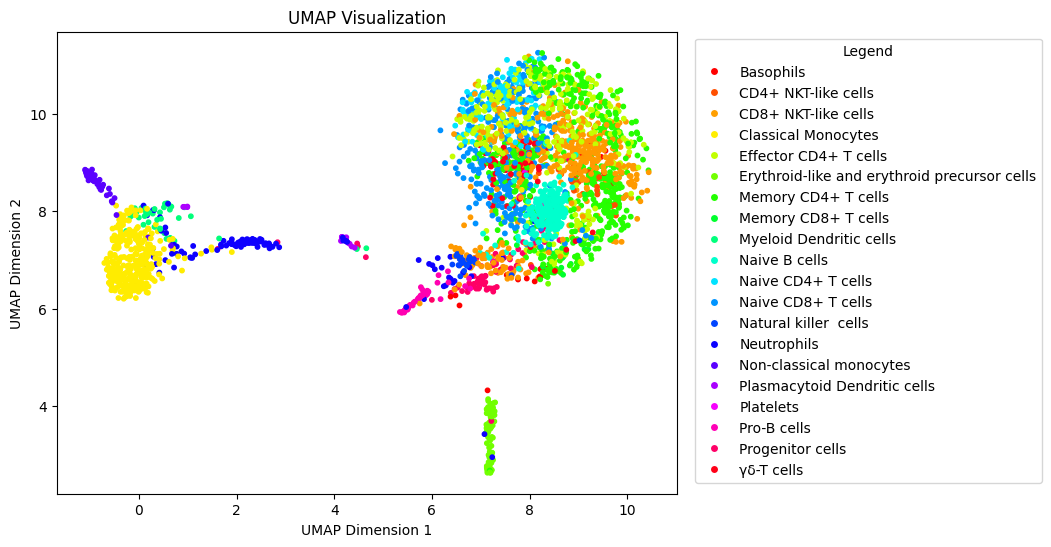

In [5]:
# From begining
all_preds_ordered = []
all_X = []
for i in all_preds_indices:
    all_preds_ordered.append(train_env.data_env.target[i])
    all_X.append(train_env.data_env.X[i].numpy())

#loss_module = scRNASeq_model.SNNLoss(use_weights=True, targets=torch.tensor(train_env.data_env.target), temperature=1.0, device="cpu")#nn.CrossEntropyLoss()
#loss = loss_module(torch.tensor(all_X),torch.tensor(all_preds_ordered))
#print(f"Loss: {loss}")

# Reverse transform labels
#all_preds_ordered = data_env.label_encoder.inverse_transform(all_preds_ordered)

# Create a UMAP embedding
umap_model = umap.UMAP(n_neighbors=15, random_state=42)
umap_embedding = umap_model.fit_transform(all_X)

# Create a color mapping for the legend
color_map = pd.Series(all_preds_ordered, dtype="category")
cmap = plt.cm.get_cmap('hsv', len(color_map.cat.categories))

# Visualize the UMAP embedding with a legend
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=color_map.cat.codes, cmap='hsv', s=10)
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Add a legend to the right of the plot
legend_labels = {cat: str(train_env.data_env.label_encoder.inverse_transform([cat])[0]) for cat in color_map.cat.categories}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[cat], markerfacecolor=cmap(i / len(color_map.cat.categories))) for i, cat in enumerate(color_map.cat.categories)]
plt.legend(handles=handles, title='Legend', bbox_to_anchor=(1.6, 1), loc='upper right')

plt.show()

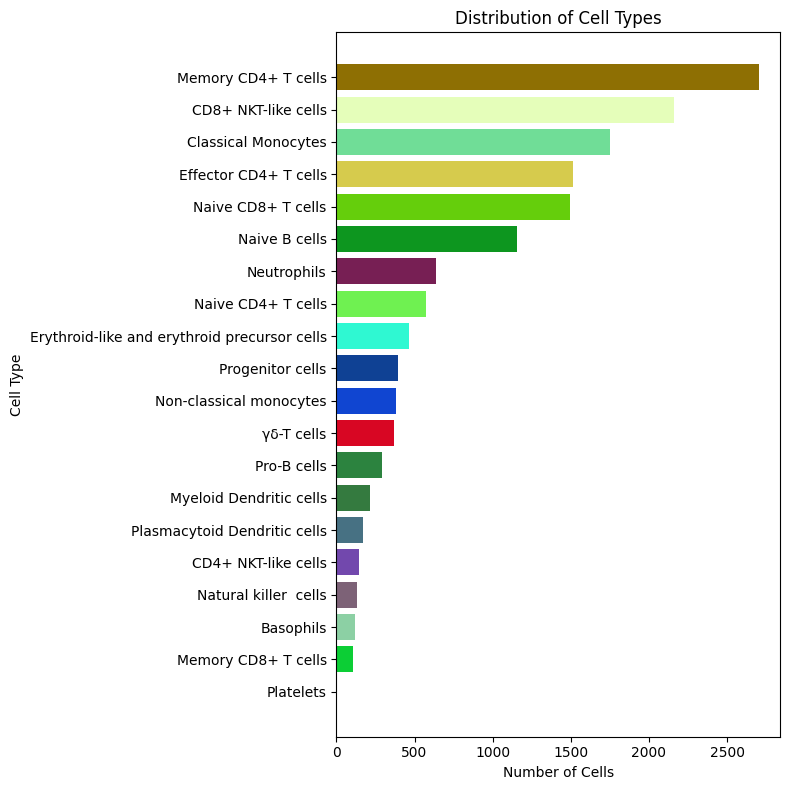

In [6]:
import matplotlib.pyplot as plt
import random

# Visualize distribution of cell types
cell_types = train_env.data_env.labels#all_preds_ordered

cell_type_counts = {}
for string in cell_types:
    if string in cell_type_counts:
        cell_type_counts[string] += 1
    else:
        cell_type_counts[string] = 1

sorted_data = sorted(cell_type_counts.items(), key=lambda x: x[1], reverse=False)
unique_strings, counts = zip(*sorted_data)

bar_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in unique_strings]

plt.figure(figsize=(8,8))
plt.barh(unique_strings, counts, color=bar_colors)

plt.xlabel('Number of Cells')
plt.ylabel('Cell Type')
plt.title('Distribution of Cell Types')

plt.tight_layout()
plt.show()

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\user\AppData\Local\Temp\ipykernel_14236\3330987252.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(color_map.cat.categories))


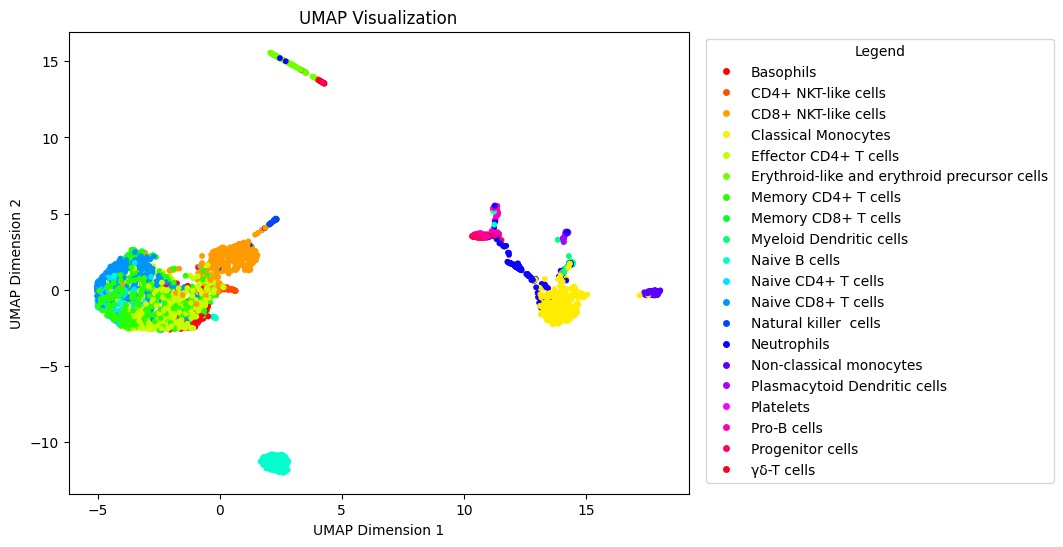

In [7]:
# After model

all_preds_ordered = []
for i in all_preds_indices:
    all_preds_ordered.append(train_env.data_env.target[i])

#loss = loss_module(torch.tensor(all_preds),torch.tensor(all_preds_ordered))
#print(f"Loss: {loss}")

# Reverse transform labels
#all_preds_ordered = data_env.label_encoder.inverse_transform(all_preds_ordered)

# Create a UMAP embedding
umap_model = umap.UMAP(n_neighbors=15, random_state=42)
umap_embedding = umap_model.fit_transform(all_preds)

# Create a color mapping for the legend
color_map = pd.Series(all_preds_ordered, dtype="category")
cmap = plt.cm.get_cmap('hsv', len(color_map.cat.categories))

# Visualize the UMAP embedding with a legend
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=color_map.cat.codes, cmap='hsv', s=10)
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Add a legend to the right of the plot
legend_labels = {cat: str(train_env.data_env.label_encoder.inverse_transform([cat])[0]) for cat in color_map.cat.categories}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[cat], markerfacecolor=cmap(i / len(color_map.cat.categories))) for i, cat in enumerate(color_map.cat.categories)]
plt.legend(handles=handles, title='Legend', bbox_to_anchor=(1.6, 1), loc='upper right')

plt.show()

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\user\AppData\Local\Temp\ipykernel_14236\3469287539.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(color_map.cat.categories))


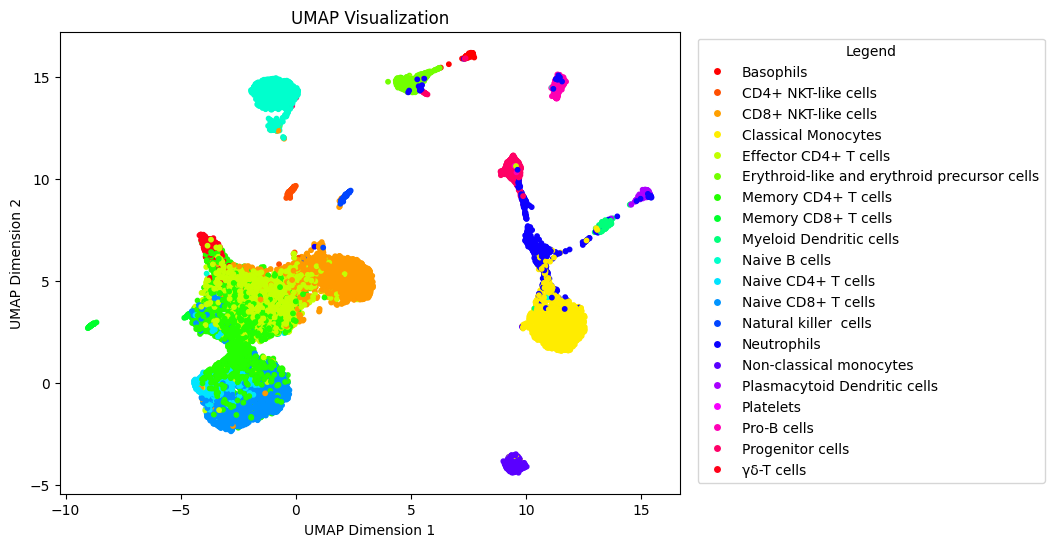

In [8]:
# Predict on all data, including training data

predictions = train_env.predict(data_=train_env.data_env)

# Create a UMAP embedding
umap_model = umap.UMAP(n_neighbors=15, random_state=42)
umap_embedding = umap_model.fit_transform(predictions)

# Create a color mapping for the legend
color_map = pd.Series(train_env.data_env.target, dtype="category")
cmap = plt.cm.get_cmap('hsv', len(color_map.cat.categories))

# Visualize the UMAP embedding with a legend
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=color_map.cat.codes, cmap='hsv', s=10)
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Add a legend to the right of the plot
legend_labels = {cat: str(train_env.data_env.label_encoder.inverse_transform([cat])[0]) for cat in color_map.cat.categories}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[cat], markerfacecolor=cmap(i / len(color_map.cat.categories))) for i, cat in enumerate(color_map.cat.categories)]
plt.legend(handles=handles, title='Legend', bbox_to_anchor=(1.6, 1), loc='upper right')

plt.show()